In [1]:
import numpy as np
from scipy.linalg import solve_continuous_are
from scipy.linalg import inv
import matplotlib.pyplot as plt

In [2]:
def wrap_circular_value(input_value):
    return (input_value + np.pi) % (2*np.pi) - np.pi

class BicycleModel:
    xdim: int = 6
    xnames = ["x_I", "y_I", "theta", "vx_B", "vy_B", "omega"]
    udim: int = 2
    unames = ["u_v", "u_steering"]
    action_lims = lambda self: np.array([[-5.0, 5.0],
                                        [-np.deg2rad(28), np.deg2rad(28)]])

    def dynamics(self, state, action, dt):
        x, y, theta, vx, vy, omega = state
        u_v, u_steering = action

        m = 11.5
        L = 0.4
        Iz = 0.5
        Cy = 100
        tau = 0.1

        vx_dot = (-1/tau) * vx + (1/tau) * u_v
        vy_dot = (-Cy/ (m * vx)) * vy - vx * omega  + (Cy / m) * u_steering
        omega_dot = ((-L**2 * Cy) / (2 * Iz * vx)) * omega - ((L * Cy) / (2 * Iz)) * u_steering

        vx_B = vx + dt * vx_dot
        vy_B = vy + dt * vy_dot
        omega = omega + dt * omega_dot

        R = np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])

        v_B = np.array([vx_B, vy_B])
        v_I = R @ v_B
        x = x + dt * v_I[0]
        y = y + dt * v_I[1]
        theta = theta + dt * omega

        # Note, you can also pick a different representation for theta, then you don't need to wrap the angle.
        theta = wrap_circular_value(theta)

        next_state = np.array([x, y, theta, vx_B, vy_B, omega])

        return next_state

    def uv_dynamics(self, state, vx_d, vx_d_dot, k, dt):
        x, y, theta, vx, vy, omega = state
        u_steering = 0
        e = vx - vx_d

        m = 11.5
        L = 0.4
        Iz = 0.5
        Cy = 100
        tau = 0.1

        u_v = vx_d - k * e + tau * vx_d_dot

        vx_dot = (-1/tau) * vx + (1/tau) * u_v
        vy_dot = (-Cy/ (m * vx)) * vy - vx * omega  + (Cy / m) * u_steering
        omega_dot = ((-L**2 * Cy) / (2 * Iz * vx)) * omega - ((L * Cy) / (2 * Iz)) * u_steering

        vx_B = vx + dt * vx_dot
        vy_B = vy + dt * vy_dot
        omega = omega + dt * omega_dot

        R = np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])

        v_B = np.array([vx_B, vy_B])
        v_I = R @ v_B
        x = x + dt * v_I[0]
        y = y + dt * v_I[1]
        theta = theta + dt * omega

        # Note, you can also pick a different representation for theta, then you don't need to wrap the angle.
        theta = wrap_circular_value(theta)

        next_state = np.array([x, y, theta, vx_B, vy_B, omega])

        return next_state


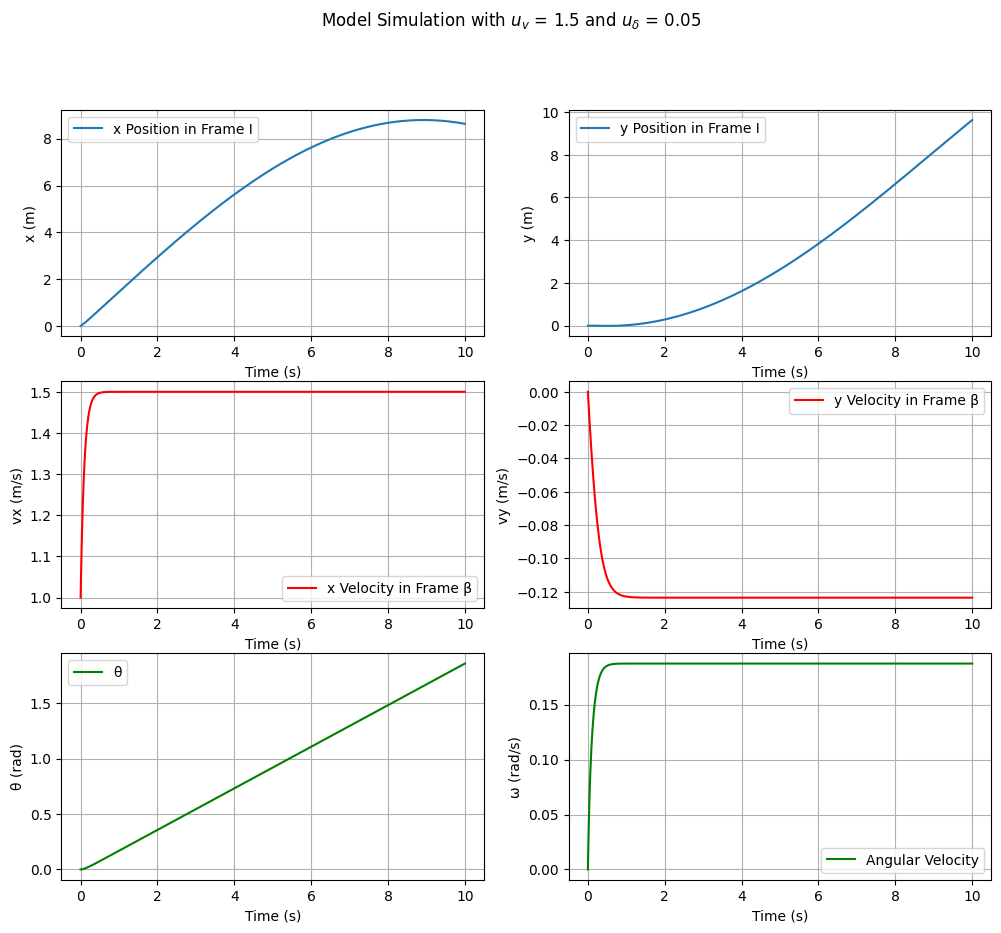

In [3]:
# Problem 1 Task 1
state = np.array([0, 0, 0, 1.0, 0, 0]) # initial state
action = np.array([1.50, -0.05])

model = BicycleModel()
states = [state]
end_time = 10.0 # how long the simulation should run for
num_points = 1000
dt = end_time/num_points
for i in range(num_points):
  state = model.dynamics(state, action, dt)
  states.append(state)

states = np.array(states)
time = np.linspace(0, end_time, num_points + 1)

fig, ax = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Model Simulation with $u_v$ = 1.5 and $u_δ$ = 0.05")

ax[0,0].plot(time, states[:, 0], label = "x Position in Frame I")
ax[0,0].grid()
ax[0,0].set_xlabel("Time (s)")
ax[0,0].set_ylabel("x (m)")
ax[0,0].legend()

ax[0,1].plot(time, states[:, 1], label = "y Position in Frame I")
ax[0,1].grid()
ax[0,1].set_xlabel("Time (s)")
ax[0,1].set_ylabel("y (m)")
ax[0,1].legend()

ax[1,0].plot(time, states[:, 3], label = "x Velocity in Frame β", color = "red")
ax[1,0].grid()
ax[1,0].set_xlabel("Time (s)")
ax[1,0].set_ylabel("vx (m/s)")
ax[1,0].legend()

ax[1,1].plot(time, states[:, 4], label = "y Velocity in Frame β", color = "red")
ax[1,1].grid()
ax[1,1].set_xlabel("Time (s)")
ax[1,1].set_ylabel("vy (m/s)")
ax[1,1].legend()


ax[2,0].plot(time, states[:, 2], label = "θ",  color = "green")
ax[2,0].grid()
ax[2,0].set_xlabel("Time (s)")
ax[2,0].set_ylabel("θ (rad)")
ax[2,0].legend()

ax[2,1].plot(time, states[:, 5], label = "Angular Velocity", color = "green")
ax[2,1].grid()
ax[2,1].set_xlabel("Time (s)")
ax[2,1].set_ylabel("ω (rad/s)")
ax[2,1].legend()
plt.show()

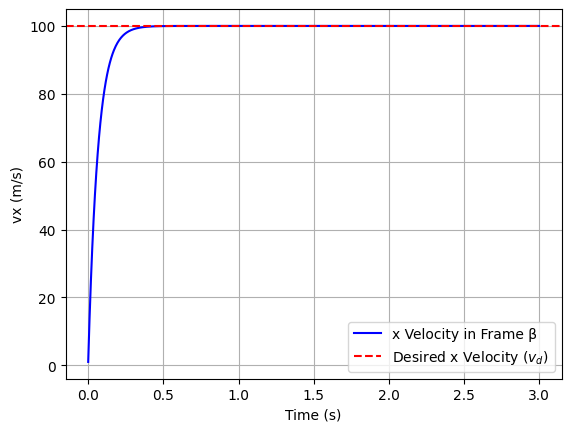

In [4]:
# Problem 1 Task 3
state = np.array([0, 0, 0, 1.0, 0, 0]) # initial state
vx_d = 100
vx_d_dot = 0
k = 0.5

model = BicycleModel()
states = [state]
end_time = 3.0 # how long the simulation should run for
num_points = 1000
dt = end_time/num_points
for i in range(num_points):
  state = model.uv_dynamics(state, vx_d, vx_d_dot, k, dt)
  states.append(state)

states = np.array(states)
time = np.linspace(0, end_time, num_points + 1)

plt.plot(time, states[:, 3], label = "x Velocity in Frame β", color = "blue")
plt.axhline(y=vx_d, color="r", linestyle="--", label="Desired x Velocity ($v_{d}$)")
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("vx (m/s)")
plt.legend()
plt.show()

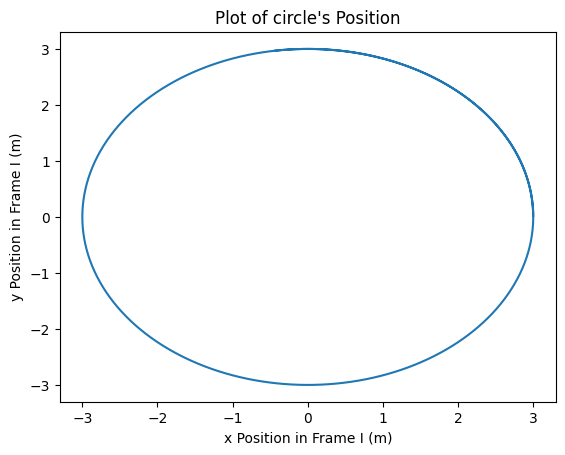

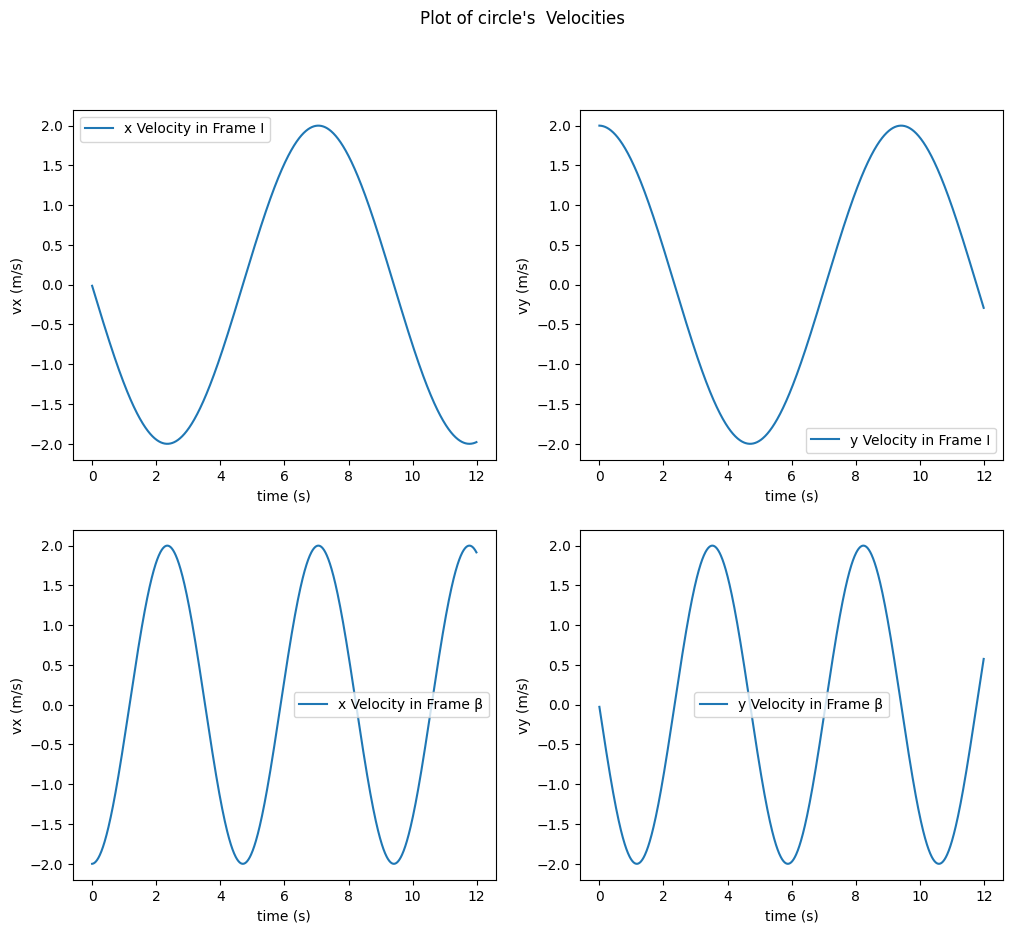

In [7]:
# Problem 1 Task 4
import math
import numpy as np
import matplotlib.pyplot as plt

def compute_fig8_simple(period, length, current_time, initial_state_I):
    t = current_time
    omega = 2 * np.pi / period
    x = length * np.sin(omega * t)
    y = length/2  * np.sin(2 * omega * t)
    z = 0.0
    vel_x = length * omega * np.cos(omega * t)
    vel_y = length * omega * np.cos(2 * omega * t)
    vel_z = 0.0

    fig_8_start_heading = initial_state_I[2] - np.pi/4
    R = np.array([[np.cos(fig_8_start_heading), -np.sin(fig_8_start_heading)],
                [np.sin(fig_8_start_heading), np.cos(fig_8_start_heading)]])
    x, y = R @ np.array([x, y]) + initial_state_I[0:2]
    vel_x, vel_y = R @ np.array([vel_x, vel_y])

    norm = np.sqrt(vel_x**2 + vel_y**2)
    cos_theta = vel_x/norm
    sin_theta = vel_y/norm

    # Transformation Matrix
    T = np.array([[cos_theta, -sin_theta],
                [sin_theta, cos_theta]])

    vx_B, vy_B = T @ np.array([vel_x, vel_y])

    return x, y, z, vel_x, vel_y, vel_z, vx_B, vy_B

def compute_circle(angle, dt, v_desired, initial_state_I):
    R = 3.0
    omega = v_desired / R
    angle = angle + dt * omega
    x = R * math.cos(angle) + initial_state_I[0]
    y = R * math.sin(angle) + initial_state_I[1]
    z = 0.0
    x_dot = -R * math.sin(angle) * omega
    y_dot = R * math.cos(angle) * omega
    z_dot = 0.0

    vel_x, vel_y = x_dot, y_dot
    norm = np.sqrt(vel_x**2 + vel_y**2)
    cos_theta = vel_x/norm
    sin_theta = vel_y/norm

    # Transformation Matrix
    T = np.array([[cos_theta, -sin_theta],
                [sin_theta, cos_theta]])

    vx_B, vy_B = T @ np.array([vel_x, vel_y])

    return x, y, z, x_dot, y_dot, z_dot, angle, vx_B, vy_B

def compute_circle_start_on_circle(angle, dt, v_desired, initial_state_I):
    R = 2.2
    omega = v_desired / R
    angle = angle + dt * omega

    x0, y0, th0 = initial_state_I[0], initial_state_I[1], initial_state_I[2]
    x = x0 - R * math.sin(th0) + R * math.sin((angle + th0))
    y = y0 + R * math.cos(th0) - R * math.cos((angle + th0))
    z = 0.0
    x_dot = R * math.cos(angle + th0) * omega
    y_dot = R * math.sin(angle + th0) * omega
    z_dot = 0.0

    vel_x, vel_y = x_dot, y_dot
    norm = np.sqrt(vel_x**2 + vel_y**2)
    cos_theta = vel_x/norm
    sin_theta = vel_y/norm

    # Transformation Matrix
    T = np.array([[cos_theta, -sin_theta],
                [sin_theta, cos_theta]])

    vx_B, vy_B = T @ np.array([vel_x, vel_y])

    return x, y, z, x_dot, y_dot, z_dot, angle, vx_B, vy_B

NAME_TRAJ = 'circle'

x_list_I = []
y_list_I = []
t = []

vx_list_I = []
vy_list_I = []

vx_list_B = []
vy_list_B = []

if NAME_TRAJ == 'fig8_simple':
    period = 10.0
    length = 2.0
    N = 100
    dt = period / N
    t = np.linspace(0, period, N)

    for i in range(N):
        current_time = t[i]
        initial_state_I = np.array([0.0, 0.0, 0.0])
        x, y, z, x_dot, y_dot, z_dot, vx_B, vy_B = compute_fig8_simple(period, length, current_time, initial_state_I)

        x_list_I.append(x)
        y_list_I.append(y)

        vx_list_I.append(x_dot)
        vy_list_I.append(y_dot)

        vx_list_B.append(vx_B)
        vy_list_B.append(vy_B)

if NAME_TRAJ == 'circle' or NAME_TRAJ == 'circle_start_on_circle':
    angle = 0.0
    END_TIME = 12.0 # seconds
    dt = 0.01
    N = int(END_TIME / dt)
    t = np.linspace(0, END_TIME, N+1)[:-1]
    v_desired = 2.0
    initial_state_I = np.array([0.0, 0.0, 0.0])
    for i in range(N):
        x, y, z, x_dot, y_dot, z_dot, angle, vx_B, vy_B = compute_circle(angle, dt, v_desired, initial_state_I)
        x_list_I.append(x)
        y_list_I.append(y)

        vx_list_I.append(x_dot)
        vy_list_I.append(y_dot)

        vx_list_B.append(vx_B)
        vy_list_B.append(vy_B)


plt.plot(x_list_I, y_list_I)
plt.title("Plot of {}'s Position".format(NAME_TRAJ))
plt.ylabel("y Position in Frame I (m)")
plt.xlabel("x Position in Frame I (m)")
plt.show()


fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Plot of {}'s  Velocities".format(NAME_TRAJ))

ax[0,0].plot(t, vx_list_I, label = "x Velocity in Frame I".format(NAME_TRAJ))
ax[0,0].set_ylabel("vx (m/s)")
ax[0,0].set_xlabel("time (s)")
ax[0,0].legend()

ax[0,1].plot(t, vy_list_I, label = "y Velocity in Frame I".format(NAME_TRAJ))
ax[0,1].set_ylabel("vy (m/s)")
ax[0,1].set_xlabel("time (s)")
ax[0,1].legend()


ax[1,0].plot(t, vx_list_B, label = "x Velocity in Frame β".format(NAME_TRAJ) )
ax[1,0].set_ylabel("vx (m/s)")
ax[1,0].set_xlabel("time (s)")
ax[1,0].legend()

ax[1,1].plot(t, vy_list_B, label = "y Velocity in Frame β".format(NAME_TRAJ))
ax[1,1].set_ylabel("vy (m/s)")
ax[1,1].set_xlabel("time (s)")
ax[1,1].legend()

plt.show()

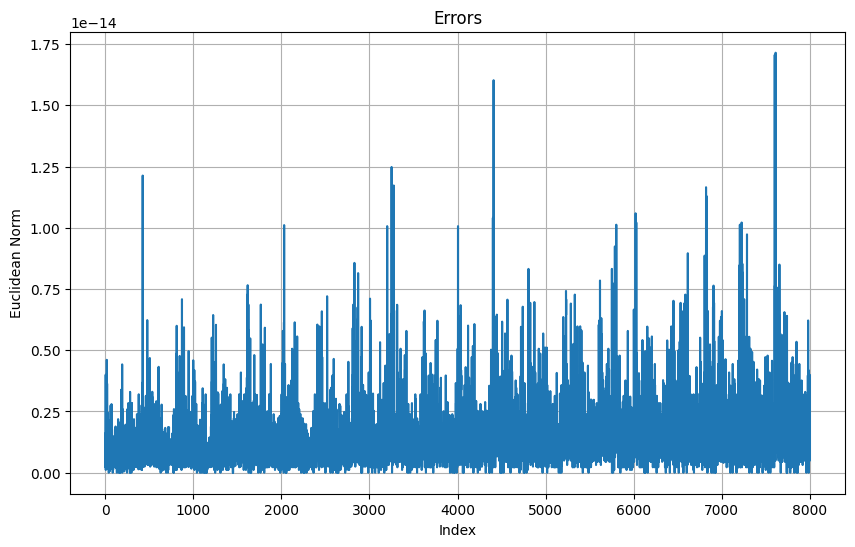

In [6]:
# Problem 2 (Task 2)
A = np.array([[0, 1],
              [0, 0]])
B = np.array([[0],
              [1]])
q1_vals = np.linspace(1, 20, 20)
q2_vals = np.linspace(1, 20, 20)
qu_vals = np.linspace(1, 20, 20)
errors = []

for q1 in q1_vals:
  for q2 in q2_vals:
    for qu in qu_vals:

      # implementation of LQR
      Q = np.array([[q1, 0],
              [0, q2]])

      R = np.array([[qu]])

      P = solve_continuous_are(A, B, Q, R)
      K = inv(R) @ B.T @ P

      # result obtained in task 1
      p12 = np.sqrt(q1*qu)
      p22 = np.sqrt((2 * p12 + q2)*qu)
      k1 = (1/qu) * p12
      k2 = (1/qu) * p22

      # euclidean norm as error
      error = np.sqrt((k1 - K[0][0])**2 + (k2 - K[0,1])**2)
      errors.append(error)

index = np.arange(len(errors))
plt.figure(figsize=(10, 6))
plt.plot(index, np.array(errors))
plt.title("Errors")
plt.ylabel("Euclidean Norm")
plt.xlabel("Index")
plt.grid()
plt.show()